In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import requests
import os
import json
import datetime

# Gather

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'    
response = requests.get(url)
response

<Response [200]>

In [5]:
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [6]:
os.listdir(folder_name)

['image-predictions.tsv', '.ipynb_checkpoints']

In [7]:
img_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [8]:
img_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [9]:
list = []
with open('tweet-json.txt') as json_file: 
      for line in json_file:
            data = json.loads(line)
            dict = {
                'id': data['id'],
                'favorite_count': data['favorite_count'],
                'retweet_count': data['retweet_count']
            }
            list.append(dict)

In [10]:
twitter_api = pd.DataFrame(list)

In [11]:
twitter_api.head()

,favorite_count,id,retweet_count
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774


# Assess

In [12]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [13]:
twitter_archive['expanded_urls'].isnull().value_counts()

False    2297
True       59
Name: expanded_urls, dtype: int64

In [14]:
twitter_archive['retweeted_status_id'].isnull().value_counts()

True     2175
False     181
Name: retweeted_status_id, dtype: int64

In [15]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
twitter_archive['rating_numerator'].value_counts(), twitter_archive['rating_denominator'].value_counts()

(12      558
 11      464
 10      461
 13      351
 9       158
 8       102
 7        55
 14       54
 5        37
 6        32
 3        19
 4        17
 1         9
 2         9
 420       2
 0         2
 15        2
 75        2
 80        1
 20        1
 24        1
 26        1
 44        1
 50        1
 60        1
 165       1
 84        1
 88        1
 144       1
 182       1
 143       1
 666       1
 960       1
 1776      1
 17        1
 27        1
 45        1
 99        1
 121       1
 204       1
 Name: rating_numerator, dtype: int64, 10     2333
 11        3
 50        3
 80        2
 20        2
 2         1
 16        1
 40        1
 70        1
 15        1
 90        1
 110       1
 120       1
 130       1
 150       1
 170       1
 7         1
 0         1
 Name: rating_denominator, dtype: int64)

In [17]:
img_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [18]:
twitter_api

,favorite_count,id,retweet_count
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774
5,20562,891087950875897856,3261
6,12041,890971913173991426,2158
7,56848,890729181411237888,16716
8,28226,890609185150312448,4429
9,32467,890240255349198849,7711


In [19]:
twitter_archive.info(), img_predictions.info(), twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

(None, None, None)

In [20]:
twitter_api['id'].duplicated().value_counts(), twitter_archive['tweet_id'].duplicated().value_counts(), img_predictions['tweet_id'].duplicated().value_counts()

(False    2354
 Name: id, dtype: int64, False    2356
 Name: tweet_id, dtype: int64, False    2075
 Name: tweet_id, dtype: int64)

## Quality
* Some rows are replies or retweets not original tweets 
* Source column does not provide useful information 
* Timestamp column is stored as an object 
* Tweet id and id columns are stored as integer values 
* Some rating numerators and denominators are not equal to the associated text 
* Text columns include url's 
* Two url columns is unnecessaary 
* 2nd and 3rd Predictions are not as important as 1st prediction 
* Image numbers are not needed 
* Some column names are difficult to understand
* Columns not arranged in easy to read format

## Tidiness
* twitter_api and img_predictions tables are not obersvational units on their own
* Doggo, floofer, puppo and pupper columns belong in a singular column

# Clean

## Define
Remove rows that contain non original tweets(i.e replies and retweets) then drop respective columns


## Code

In [21]:
twitter_archive_clean = twitter_archive.copy()

In [22]:
img_predictions_clean = img_predictions.copy()
twitter_api_clean = twitter_api.copy()

In [23]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

In [24]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.isnull()]

In [25]:
twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace = True)

### Test

In [26]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


In [27]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Define
Drop Source Column

### Code

In [28]:
twitter_archive_clean.drop(['source'], axis = 1, inplace = True)

### Test

In [29]:
twitter_archive_clean.head(1)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


### Define
Change Timestamp column datatype to Datetime

### Code

In [30]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

### Test

In [31]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 196.6+ KB


### Define
Change Tweet_id columns in img_predictions and twitter_archive tables and id column in twitter_api table to categorical datatypess

### Code

In [32]:
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype('object')
img_predictions_clean.tweet_id = img_predictions_clean.tweet_id.astype('object')
twitter_api_clean.id = twitter_api_clean.id.astype('object')

### Test

In [33]:
twitter_archive_clean.info(), img_predictions_clean.info(), twitter_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 196.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf

(None, None, None)

### Define
Merge all three columns into one

### Code

In [34]:
twiter_api_clean = twitter_api_clean.rename(index=str, columns={"id": "tweet_id"}, inplace = True)

In [35]:
twitter = pd.merge(twitter_archive_clean, twitter_api_clean, on='tweet_id', how='inner')

In [36]:
twitter = pd.merge(twitter, img_predictions_clean, on='tweet_id', how='inner')

### Test

In [37]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 24 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
favorite_count        1971 non-null int64
retweet_count         1971 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non

In [38]:
sum(twitter.expanded_urls.isnull())

0

### Define
Change Twitter_id column to categorical variable

### Code

In [39]:
twitter.tweet_id = twitter.tweet_id.astype('object')

### Test

In [40]:
twitter.tweet_id.dtype

dtype('O')

### Define
Extract new correct ratings from text columns and then drop old ratings columns

### Code

In [41]:
twitter['ratings'] = twitter['text'].str.extract('(\d\d\.\d.10|\d\.\d.10|\d.10|\d\d.10)', expand=True)

In [42]:
twitter.ratings.value_counts()

12/10      446
10/10      418
11/10      393
13/10      254
9/10       150
8/10        95
7/10        51
14/10       34
5/10        32
6/10        32
3/10        19
4/10        15
2/10         9
1/10         4
0/10         1
75/10        1
76/10        1
26/10        1
20/10        1
13.5/10      1
27/10        1
Name: ratings, dtype: int64

In [43]:
twitter['numerator'] = twitter['ratings'].str.extract('(\d+\.5|^20|^10|^11|^12|^13|^14|^16|^1|^2|^3|^4|^5|^6|^7|^8|^9|^0)', expand=True)

In [44]:
twitter['denominator'] = twitter['ratings'].str.extract('(10$)', expand=True)

In [45]:
twitter.numerator.value_counts()

12      446
10      418
11      393
13      254
9       150
8        95
7        53
14       34
6        32
5        32
3        19
4        15
2        11
1         4
13.5      1
0         1
20        1
Name: numerator, dtype: int64

In [46]:
twitter.numerator = twitter.numerator.astype('float')

In [47]:
twitter.denominator.value_counts()

10    1959
Name: denominator, dtype: int64

In [48]:
twitter.drop(['rating_numerator', 'rating_denominator', 'ratings'], axis = 1, inplace = True)

### Test

In [49]:
sum(twitter['numerator'].isnull())

12

In [50]:
sum(twitter['denominator'].isnull())

12

In [51]:
twitter = twitter.dropna(axis=0, subset=['denominator'])

In [52]:
twitter = twitter.dropna(axis=0, subset=['numerator'])

In [53]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1959 entries, 0 to 1970
Data columns (total 24 columns):
tweet_id          1959 non-null object
timestamp         1959 non-null datetime64[ns]
text              1959 non-null object
expanded_urls     1959 non-null object
name              1959 non-null object
doggo             1959 non-null object
floofer           1959 non-null object
pupper            1959 non-null object
puppo             1959 non-null object
favorite_count    1959 non-null int64
retweet_count     1959 non-null int64
jpg_url           1959 non-null object
img_num           1959 non-null int64
p1                1959 non-null object
p1_conf           1959 non-null float64
p1_dog            1959 non-null bool
p2                1959 non-null object
p2_conf           1959 non-null float64
p2_dog            1959 non-null bool
p3                1959 non-null object
p3_conf           1959 non-null float64
p3_dog            1959 non-null bool
numerator         1959 non-null f

### Define
Extract url's from end of text tweets then drop expanded url's

### Code

In [54]:
twitter['URL'] = twitter['text'].str.extract('(http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+)', expand=True)

In [55]:
twitter.drop(['expanded_urls'], axis = 1, inplace = True)

In [56]:
twitter['text'] = twitter['text'].str.replace('http\S+|www.\S+', '', case=False)

### Test

In [57]:
twitter.head(1)

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,numerator,denominator,URL
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,None,None,None,None,39467,8853,...,False,bagel,0.085851,False,banana,0.07611,False,13.0,10,https://t.co/MgUWQ76dJU


In [58]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1959 entries, 0 to 1970
Data columns (total 24 columns):
tweet_id          1959 non-null object
timestamp         1959 non-null datetime64[ns]
text              1959 non-null object
name              1959 non-null object
doggo             1959 non-null object
floofer           1959 non-null object
pupper            1959 non-null object
puppo             1959 non-null object
favorite_count    1959 non-null int64
retweet_count     1959 non-null int64
jpg_url           1959 non-null object
img_num           1959 non-null int64
p1                1959 non-null object
p1_conf           1959 non-null float64
p1_dog            1959 non-null bool
p2                1959 non-null object
p2_conf           1959 non-null float64
p2_dog            1959 non-null bool
p3                1959 non-null object
p3_conf           1959 non-null float64
p3_dog            1959 non-null bool
numerator         1959 non-null float64
denominator       1959 non-null 

### Define
Drop image number and prediction 2 & 3 columns

### Code

In [59]:
twitter.drop(['img_num', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1, inplace = True)

### Test

In [60]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1959 entries, 0 to 1970
Data columns (total 17 columns):
tweet_id          1959 non-null object
timestamp         1959 non-null datetime64[ns]
text              1959 non-null object
name              1959 non-null object
doggo             1959 non-null object
floofer           1959 non-null object
pupper            1959 non-null object
puppo             1959 non-null object
favorite_count    1959 non-null int64
retweet_count     1959 non-null int64
jpg_url           1959 non-null object
p1                1959 non-null object
p1_conf           1959 non-null float64
p1_dog            1959 non-null bool
numerator         1959 non-null float64
denominator       1959 non-null object
URL               1959 non-null object
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2), object(11)
memory usage: 262.1+ KB


### Define
Combine Doggo, floofer, pupper and puppo columns into one column called dog_types

### Code

In [61]:
twitter.doggo.fillna(value=pd.np.nan, inplace=True),
twitter.floofer.fillna(value=pd.np.nan, inplace=True),
twitter.pupper.fillna(value=pd.np.nan, inplace=True),
twitter.puppo.fillna(value=pd.np.nan, inplace=True)

In [62]:
twitter = pd.melt(twitter, id_vars=['tweet_id', 'timestamp', 'text', 'name', 'favorite_count', 'retweet_count', 'jpg_url', 'p1', 'p1_conf', 'p1_dog', 'numerator', 'denominator', 'URL'], value_name ='dog_type') 

In [63]:
twitter.drop(['variable'], axis = 1, inplace = True)

In [64]:
twitter['dog_type'].value_counts()

None       7523
pupper      209
doggo        73
puppo        23
floofer       8
Name: dog_type, dtype: int64

In [65]:
twitter.drop_duplicates(inplace = True)

In [66]:
twitter['dog_type'].value_counts()

None       1959
pupper      209
doggo        73
puppo        23
floofer       8
Name: dog_type, dtype: int64

In [67]:
twitter['tweet_id'].duplicated().value_counts()

False    1959
True      313
Name: tweet_id, dtype: int64

In [68]:
twitter['dog_type'].replace('None', np.nan, inplace=True)

In [69]:
twitter = twitter[~twitter['tweet_id'].duplicated(keep=False) | twitter[['dog_type']].notnull().any(axis=1)]

### Test

In [70]:
twitter['dog_type'].value_counts()

pupper     209
doggo       73
puppo       23
floofer      8
Name: dog_type, dtype: int64

### Define
Rearrange Columns

### Code

In [71]:
twitter = twitter[['tweet_id', 'timestamp', 'text', 'name', 'dog_type', 'numerator', 'denominator', 'favorite_count', 'retweet_count', 'p1', 'p1_conf', 'p1_dog', 'URL', 'jpg_url']]


### Test

In [72]:
twitter.head(1)

,tweet_id,timestamp,text,name,dog_type,numerator,denominator,favorite_count,retweet_count,p1,p1_conf,p1_dog,URL,jpg_url
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,13.0,10,39467,8853,orange,0.097049,False,https://t.co/MgUWQ76dJU,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg


### Define
Rename Columns

### Code

In [73]:
twitter = twitter.rename(index=str, columns={"tweet_id": "Tweet ID", "timestamp": "Timestamp", "text": "Text", "name": "Name", "dog_type": "Dog Type", "numerator": "Rating Numerator", "denominator": "Rating Denominator", "favorite_count": "Fav Count", "retweet_count": "RT Count", "p1": "Prediction", "p1_conf": "Prediction Confidence", "p1_dog": "Dog Breed", "jpg_url": "Picture URL"})

### Test

In [74]:
twitter.head(5)

,Tweet ID,Timestamp,Text,Name,Dog Type,Rating Numerator,Rating Denominator,Fav Count,RT Count,Prediction,Prediction Confidence,Dog Breed,URL,Picture URL
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,13.0,10,39467,8853,orange,0.097049,False,https://t.co/MgUWQ76dJU,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,NaN,13.0,10,33819,6514,Chihuahua,0.323581,True,https://t.co/0Xxu71qeIV,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,12.0,10,25461,4328,Chihuahua,0.716012,True,https://t.co/wUnZnhtVJB,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,Darla,NaN,13.0,10,42908,8964,paper_towel,0.170278,False,https://t.co/tD36da7qLQ,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,Franklin,NaN,12.0,10,41048,9774,basset,0.555712,True,https://t.co/AtUZn91f7f,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg


# Visualize

#### What predicted dog breeds are the most popular?

In [75]:
twitter.Prediction.value_counts()[:5]

golden_retriever      139
Labrador_retriever     91
Pembroke               88
Chihuahua              78
pug                    54
Name: Prediction, dtype: int64

In [76]:
twitter.Timestamp.value_counts()[:5]

2016-11-22 17:28:25    2
2016-07-09 01:08:47    2
2017-04-17 16:34:26    2
2017-01-07 16:59:28    2
2016-10-11 00:34:48    2
Name: Timestamp, dtype: int64

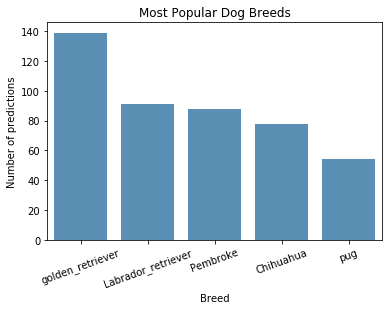

In [77]:
prediction_count  = twitter['Prediction'].value_counts()
prediction_count = prediction_count[:5,]
base_color = sb.color_palette()[0]
sb.barplot(prediction_count.index, prediction_count.values, alpha=0.8, color = base_color);
plt.title('Most Popular Dog Breeds');
plt.xlabel('Breed');
plt.ylabel("Number of predictions")
plt.xticks(rotation='20');
plt.savefig('dogtypes.jpg', bbox_inches='tight')

The 5 most popular dog breeds based on the neural network predictions are Golden Retriever, Labrador Retriever, Pembroke, Chihuahua and Pug

#### Are favorite count and retweet count positively correlated?

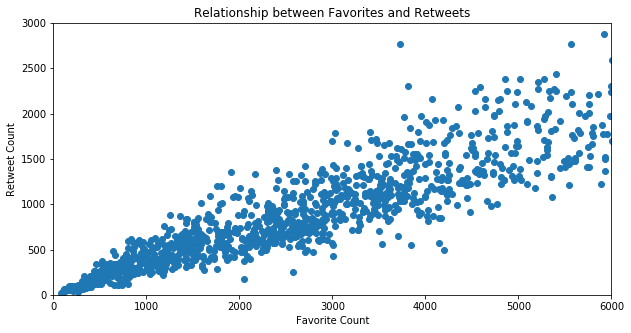

In [78]:
plt.figure(figsize=(10,5))
plt.scatter(data = twitter, x = 'Fav Count', y = 'RT Count');
plt.xlim(0, 6000);
plt.ylim(0, 3000);
plt.xlabel('Favorite Count');
plt.ylabel('Retweet Count');
plt.title('Relationship between Favorites and Retweets');
plt.savefig('favrt.jpg', bbox_inches='tight')

The scatter plot above shows a strong positive correlation between favorite count and retweet count. The more favorites a tweet has, the more retweets it is also likely to have

#### What was the average score in the dog ratings numerator?

In [79]:
twitter['Rating Numerator'] = twitter['Rating Numerator'].astype('int')

In [80]:
twitter['Rating Denominator'] = twitter['Rating Denominator'].astype('int')

In [81]:
twitter['Rating Numerator'].mean()

10.540375825292026

The average rating numerator score was 10.54

In [82]:
twitter.to_csv('twitter_archive_master.csv', index = False)